LABS : 1.1 , 2.2, 3.1,4.1

# Задача 1.1
Задана выборка пар изображений: каждая пара состоит из оригинального (original_id.bmp) изображения и искаженного (modified_id_phrase.bmp). Также задана пара контрольных изображений original_test, modified_test.

В 99% случаев искажение заключается в добавлении белого шума. В 1% случаев искажение заключается в добавлении к изображению скрытого сообщения. Алгоритм заключается в следующем:

У исходной фразы берутся порядковые номера всех символов в порядке английского алфавита (abcz -> 0,1,2,25).
Полученный вектор домножается на неизвестный коэффициент alpha и складывается с вектором картинки (image = image.flatten() + alpha*v + шум).
Если фраза слишком короткая, искажение продолжается периодически.
Требуется раскодировать фразу из контрольной пары.

NB: предполагается, что вы найдете искаженные изображения без шума с применением статистических моделей, а не перебором.

Ссылки
https://imageio.readthedocs.io/en/stable/userapi.html
https://docs.python.org/3/library/functions.html#ord


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%ls /content/drive/MyDrive/images*

/content/drive/MyDrive/images.zip


In [ ]:
import zipfile
import os

def unzip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file = "/content/drive/MyDrive/images.zip"
extract_to = "/content/curr_dir"

unzip(zip_file, extract_to)


In [ ]:
!ls /content/curr_dir/images_full

images	modified_test.bmp  original_test.bmp


In [ ]:
import imageio
import matplotlib.pyplot as plt
import os


In [ ]:
files_dict = dict()
directory = "/content/curr_dir/images_full/images"
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
        filepath = os.path.join(directory, filename)
        image = imageio.imread(filepath)
        files_dict[filename] = image

<ipython-input-6-901f2a462fe3>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filepath)


In [ ]:
control = dict()
directory = "/content/curr_dir/images_full"
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
        filepath = os.path.join(directory, filename)
        image = imageio.imread(filepath)
        control[filename] = image

<ipython-input-7-c02a22d88c15>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filepath)


In [ ]:
control.keys()

dict_keys(['original_test.bmp', 'modified_test.bmp'])

In [ ]:
import re

def extract_numbers_and_phrases(keys):
    original_keys = {}
    modified_keys = {}

    for key in keys:
        match_original = re.match(r'original_(\d+)\.bmp', key)
        match_modified = re.match(r'modified_(\d+)_(.+)\.bmp', key)

        if match_original:
            number = match_original.group(1)
            original_keys[number] = key
        elif match_modified:
            number = match_modified.group(1)
            phrase = match_modified.group(2)
            modified_keys[number] = (key, phrase)

    matching_pairs = []
    for number, original_key in original_keys.items():
        if number in modified_keys:
            modified_key, phrase = modified_keys[number]
            matching_pairs.append((original_key, modified_key, phrase))

    return matching_pairs


result = extract_numbers_and_phrases(files_dict.keys())
print(result)


[('original_42251976.bmp', 'modified_42251976_fact.bmp', 'fact'), ('original_137341995.bmp', 'modified_137341995_world.bmp', 'world'), ('original_429773143.bmp', 'modified_429773143_place.bmp', 'place'), ('original_766169421.bmp', 'modified_766169421_thing.bmp', 'thing'), ('original_789732328.bmp', 'modified_789732328_case.bmp', 'case'), ('original_667130371.bmp', 'modified_667130371_child.bmp', 'child'), ('original_368824921.bmp', 'modified_368824921_year.bmp', 'year'), ('original_100136192.bmp', 'modified_100136192_case.bmp', 'case'), ('original_893947914.bmp', 'modified_893947914_life.bmp', 'life'), ('original_521503908.bmp', 'modified_521503908_way.bmp', 'way'), ('original_114034914.bmp', 'modified_114034914_government.bmp', 'government'), ('original_274561879.bmp', 'modified_274561879_life.bmp', 'life'), ('original_797989869.bmp', 'modified_797989869_number.bmp', 'number'), ('original_183076550.bmp', 'modified_183076550_fact.bmp', 'fact'), ('original_635335056.bmp', 'modified_6353

In [ ]:
len(result ) , len(files_dict.keys())

(1000, 2000)

In [ ]:
for i , (orig , modif , fraze) in enumerate(result) :
    result[i] = (files_dict[orig] , files_dict[modif] , fraze)

In [ ]:
result[20][0].shape , result[20][0][0]

((64, 64),
 array([136, 138, 148, 141, 127, 131, 142, 139, 142, 144, 139, 139, 144,
        138, 134, 139, 139, 136, 133, 137, 142, 137, 137, 152, 157, 101,
         10,   3,   7,   4,   8,   9,  12,  10,   6,   4,  20,  67,  79,
         33,   9,  15,  34,  64,  76,  77,  73,  79,  93, 104,  94, 106,
        134,  93,  20,   3,  13,  20,  21,  28,  26,  29,  33,  32],
       dtype=uint8))

In [ ]:
def phrase_to_vector(phrase):
    alphabet = {chr(i): i - ord('a') + 1 for i in range(ord('a'), ord('z') + 1)}
    phrase = phrase.lower()
    vector = []
    for char in phrase:
        if char.isalpha():
            vector.append(alphabet[char] - 1)
        else:
            pass

    return vector

phrase = "abcdz"
vector = phrase_to_vector(phrase)
print(vector)

def vector_to_phrase(vector ) :
    alphabet = {i - ord('a') : chr(i)  for i in range(ord('a'), ord('z') + 1)}
    phrase = []
    for idx in vector:
        phrase.append(alphabet[idx] )
    return phrase

vector = [0,1,2,3,25]
phrase = vector_to_phrase(vector)
print(phrase)

[0, 1, 2, 3, 25]
['a', 'b', 'c', 'd', 'z']


In [ ]:
import numpy as np

In [ ]:
def get_full_vector(fraze , image) :
    if len(fraze) < len(image) :
        new_vector = np.zeros(len(image))
        for i in range(len(image)) :
            new_vector[i] = fraze[i % len(fraze)]
    return new_vector

In [ ]:
vectorized = []
for i , (orig , modif , fraze) in enumerate(result) :
    vectorized.append((orig.flatten() , modif.flatten() , phrase_to_vector(fraze)))

In [ ]:
full_vectors = []
for i , (orig , modif , fraze) in enumerate(vectorized) :
    full_vectors.append(get_full_vector(fraze , orig ))

In [ ]:
k = 5
original = vectorized[k][0]
modified = vectorized[k][1]
vector = full_vectors[k]

print(original[:100] - modified[:100] , vector[:100])

[  0   1   0   1 255 255   2   1   0 255 254   0   0 253   0 255   4   2
   1   0   0 254   1 254   6   0 255   0 255   0   4 255   1   0   0   0
   2   0   0 255 255   0   1   2   0   0 255   0   0   1   1 254   0   0
 255   0 254   0   0   0 255 254   1   1 254   1   0   0 255 255   0 255
   3   1 255   0   2   0   0 255 255   0   0   0   0   0   0   0   0   2
   1   0   0 255   1   4   0   0   0 255] [ 2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8.
 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.
  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.
  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.
  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.
  2.  7.  8. 11.  3.  2.  7.  8. 11.  3.]


* Найдем парметры белого шума (с удовлетворительной точностью) - пройдемся по всем векторам и посчитаем среднее и дисперсию (те случаи где используется фраза - не сильно повлияют , так как их всего 1 процент)

In [ ]:
mean = 0
std = 0
stds = []
for k in range(len(vectorized)) :
    original = np.array(vectorized[k][0], dtype = np.float64)
    modified = np.array(vectorized[k][1] , dtype = np.float64)
    vector = full_vectors[k]
    curr_mean = np.mean(original - modified)
    mean += np.mean(original - modified)
    stds.append(np.sqrt(np.mean((original - modified)**2)))
    std += np.sqrt(np.mean((original - modified -curr_mean )**2))
mean = mean / len(vectorized)
std = std / len(vectorized)
print(mean , std)

-0.28775048828125 1.5392820139061063


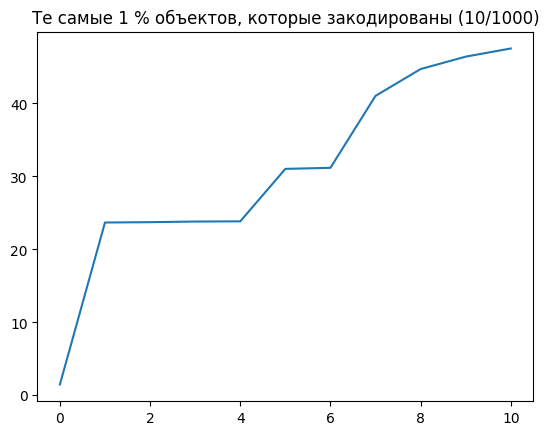

In [ ]:
plt.plot(sorted(stds)[-11:])
plt.title('Те самые 1 % объектов, которые закодированы (10/1000)')
plt.show()

In [ ]:
indices = np.argsort(stds)[-10:]

In [ ]:
indices

array([ 56, 198, 147,  33, 636, 544, 427, 774, 924, 850])

In [ ]:
modification_with_fraze = []
for k in indices :
    original = np.array(vectorized[k][0], dtype = np.float64)
    modified = np.array(vectorized[k][1] , dtype = np.float64)
    vector = full_vectors[k]
    modification_with_fraze.append((original , modified , vector))
print(len(modification_with_fraze) / len(vectorized))

0.01


In [235]:
alpha = 0
for k in range(len(modification_with_fraze)) :
    original = modification_with_fraze[k][0]
    modified = modification_with_fraze[k][1]
    vector = modification_with_fraze[k][2]
    delta = - original + modified + mean
    alpha_k = 0
    for j in range(len(delta))  :
        if vector[j] != 0 :
            alpha_k += (delta[j]/vector[j])/np.sum(vector!=0)
    print(alpha_k)
    alpha += alpha_k
alpha /= len(modification_with_fraze)
print(alpha)

3.0860776841598234
3.082475500210961
3.100496962391365
3.0848153098529023
3.063266037040853
3.0687913248697987
3.0439188982867194
3.0983746991904764
3.1132692531296104
3.111332467788391
3.08528181369209


In [236]:
test_original = np.array(control['original_test.bmp'].flatten() , dtype = np.float64)
test_modified = np.array(control['modified_test.bmp'].flatten() , dtype = np.float64)

* Избавимся от шума , который оценили по данным ранее (вычтем mean)

In [237]:
delta = - test_original + test_modified - mean
frazed_vector = delta / 3.11

* приведем в int и отобразим в пространство букв

In [238]:
frazed_vector[:15]

array([22.27901945,  7.16647926,  4.27258858, 17.13432492,  4.27258858,
       18.09895514, 19.38512877,  7.16647926,  4.27258858, 12.31117379,
       14.24043424, 13.27580402,  4.27258858, 24.2082799 , 11.34654357])

In [239]:
int_vector =  list(map( lambda y : int(y) ,frazed_vector))

In [240]:
int_vector[:15]

[22, 7, 4, 17, 4, 18, 19, 7, 4, 12, 14, 13, 4, 24, 11]

In [241]:
''.join(vector_to_phrase(int_vector)[:25])

'wheresthemoneylebowskiwhe'

* Ответ: Where is money lebowski ????

# Задача 2.2.
Требуется построить авторегрессионную модель (autoregressive moving-average model, ARMA) для данных предложенных в приложении.


https://github.com/andriygav/PSAD/blob/master/labs/lab2/data/2.1.csv

Записать задачу формально;
Выписать все формулы аналитически;
Провести вычисления всех параметров модели аналитически.
UPD: параметры p и q для ARMA можно оценить при помощи компьютера.

Все выкладки должны быть сделаны аналитически, без использования компьютера. Дополнительно к слайдам про ARMA можно почитать здесь.



* ARMA - линейная регрессия , где в качестве признаков используются предыдщие p значений и q независимых остатков в сумме.

In [ ]:
import numpy as np
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab2/data/2.2.csv"

response = requests.get(url)
data = response.text

ts = np.genfromtxt(StringIO(data), delimiter=',')



In [ ]:
ts = ts[1:]

In [ ]:
import matplotlib.pyplot as plt

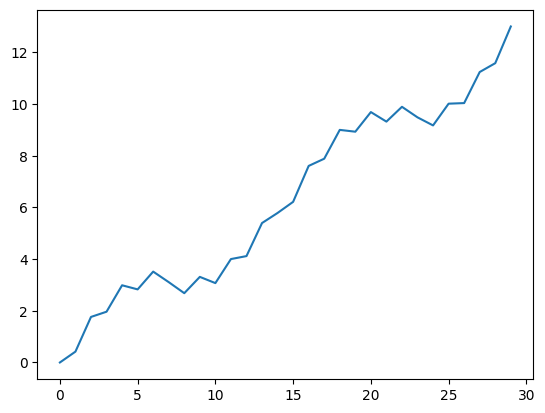

In [ ]:
plt.plot(ts)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

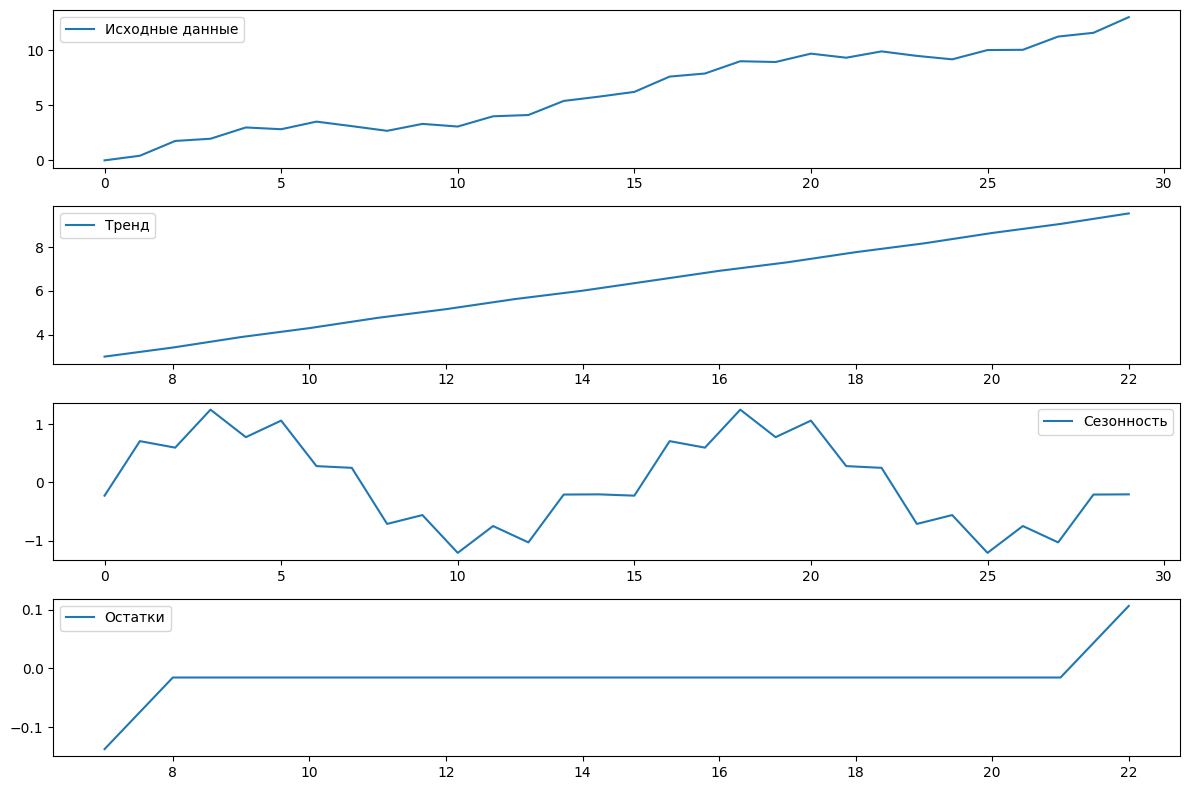

In [ ]:
result = seasonal_decompose(ts, model='additive', period=15)
time = np.arange(0,len(ts),1)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time, ts, label='Исходные данные')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, result.trend, label='Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time, result.seasonal, label='Сезонность')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time, result.resid, label='Остатки')
plt.legend()

plt.tight_layout()
plt.show()

* Возьмем p = 15, так как период равный 15 хорошо сглаживает тренд и уничтожает остатки, потому также возьмем q = 0. Раз период 15, то есть зависимость от предыдущих 15 элементов - потому берется p = 15.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


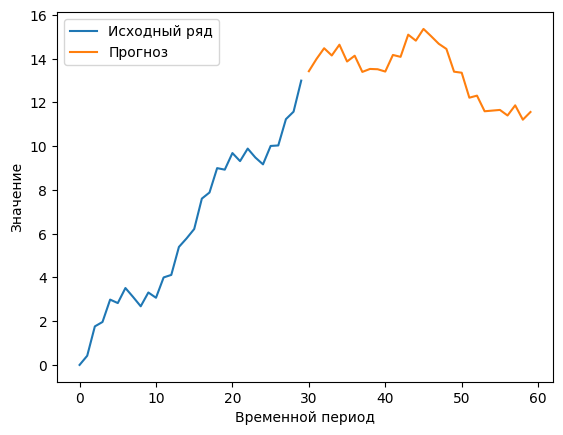

In [ ]:
model = ARIMA(ts, order=(15, 0, 0))
fit_model = model.fit()

forecast = fit_model.forecast(steps=30)

plt.plot(ts, label='Исходный ряд')
plt.plot(np.arange(len(ts), len(ts) + len(forecast)), forecast, label='Прогноз')
plt.xlabel('Временной период')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Задача 3.1.
Выборка: набор предложений на русском языке с указанием частей речи для каждого слова.

https://github.com/natasha/nerus

Требуется:

Рассмотреть последовательность частей речи как марковскую модель. Определить оптимальный порядок марковской модели.
Обучить скрытую марковскую модель по выборке. Оценить точность предсказания частей речи, посчитать энтропию на выборке.
Важно: в целях ускорения эксперимента рекомендуется взять первые 10 МБ текста из выборки.

In [1]:
!pip install nerus

In [2]:
import urllib.request
import gzip
import shutil
import os

# URL для загрузки датасета
url = "https://storage.yandexcloud.net/natasha-nerus/data/nerus_lenta.conllu.gz"
# Имя файла для сохранения
filename = "nerus_lenta.conllu.gz"

# Загрузка файла
print("Загрузка файла...")
urllib.request.urlretrieve(url, filename)



Загрузка файла...


('nerus_lenta.conllu.gz', <http.client.HTTPMessage at 0x7e9944918790>)

In [3]:
!gunzip -c nerus_lenta.conllu.gz | head

# newdoc id = 0
# sent_id = 0_0
# text = Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости.
1	Вице-премьер	_	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	7	nsubj	_	Tag=O
2	по	_	ADP	_	_	4	case	_	Tag=O
3	социальным	_	ADJ	_	Case=Dat|Degree=Pos|Number=Plur	4	amod	_	Tag=O
4	вопросам	_	NOUN	_	Animacy=Inan|Case=Dat|Gender=Masc|Number=Plur	1	nmod	_	Tag=O
5	Татьяна	_	PROPN	_	Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing	1	appos	_	Tag=B-PER
6	Голикова	_	PROPN	_	Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing	5	flat:name	_	Tag=I-PER
7	рассказала	_	VERB	_	Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	Tag=O


In [4]:
from nerus import load_nerus
NERUS = 'nerus_lenta.conllu.gz'

In [5]:
docs = load_nerus(NERUS)

In [6]:
from tqdm import tqdm
import numpy as np

In [7]:
text = []
for i , doc in enumerate(docs)  :
    for sents in doc.sents :
        sentence = []
        for token in sents.tokens :
            sentence.append( (token.text.lower() , token.pos ) )
        text.append(sentence)
    if i > 700 :
        break

In [8]:
len(text)

8167

In [192]:
# from collections import defaultdict
# def build_markov_model(sentences):
#     markov_model = defaultdict(lambda: defaultdict(int))
#     for sentence in tqdm(sentences):
#         tokens = re.findall(r"[\w']+|[.,]", sentence)
#         for i in range(len(tokens) - 1):
#             current_token = tokens[i]
#             next_token = tokens[i + 1]
#             markov_model[current_token][next_token] += 1
#     for token, next_tokens in markov_model.items():
#         total_count = sum(next_tokens.values())
#         for next_token in next_tokens:
#             markov_model[token][next_token] /= total_count

#     return markov_model

In [193]:
# markov_model = build_markov_model(sentences)

In [194]:
# def predict(token , markov_model=markov_model, greedy = True ) :
#     if token == '<end>' :
#         return None

#     if token in  markov_model.keys() and token != '.' :
#         sorted_tokens = sorted( markov_model[token].items() , key = lambda y : -y[1]  )
#         if greedy :
#             return sorted_tokens[0][0]
#         else :
#             probs = []
#             keys = []
#             for key , prob in sorted_tokens :
#                 keys.append(key)
#                 probs.append(prob)
#             return np.random.choice(keys , p = probs )
#     else :
#         return '<end>'
# print(predict('человек' , greedy = False))
# print(predict('машина'))
# print(predict('<end>') )
# print(predict('.') )

In [10]:
from nltk.tag import hmm

In [196]:
# from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(text, test_size=0.2)

In [16]:
vocab = sorted(list(set([word[0] for sentence in text for word in sentence])))
len(vocab)

29069

In [17]:
types = sorted(list(set([word[1] for sentence in text for word in sentence])))
len(types)

17

In [35]:
trainer = hmm.HiddenMarkovModelTrainer( states= types , symbols = vocab)

In [36]:
train_text = text[:int(0.8*len(text))]
test_text = text[int(0.8*len(text)):]

In [37]:
tagger = trainer.train_supervised(train_text  )

In [38]:
for t in tagger._transitions:
    print(t, tagger._transitions[t].__dict__)

NOUN {'_freqdist': FreqDist({'PUNCT': 9988, 'NOUN': 5664, 'ADP': 4846, 'VERB': 3463, 'PROPN': 2772, 'ADJ': 2702, 'CCONJ': 1187, 'ADV': 504, 'NUM': 373, 'PART': 294, ...})}
ADP {'_freqdist': FreqDist({'NOUN': 7078, 'ADJ': 2285, 'PRON': 1284, 'PROPN': 1169, 'DET': 725, 'NUM': 635, 'VERB': 168, 'PUNCT': 147, 'ADV': 50, 'X': 21, ...})}
ADJ {'_freqdist': FreqDist({'NOUN': 8054, 'ADJ': 778, 'PUNCT': 649, 'VERB': 267, 'PROPN': 259, 'ADP': 231, 'CCONJ': 156, 'NUM': 52, 'AUX': 48, 'ADV': 26, ...})}
PROPN {'_freqdist': FreqDist({'PUNCT': 3261, 'PROPN': 1819, 'VERB': 1352, 'ADP': 708, 'CCONJ': 366, 'NOUN': 259, 'ADJ': 218, 'ADV': 157, 'NUM': 83, 'PART': 71, ...})}
VERB {'_freqdist': FreqDist({'NOUN': 3579, 'ADP': 3099, 'PUNCT': 2157, 'ADJ': 1378, 'VERB': 915, 'PROPN': 489, 'PRON': 458, 'NUM': 389, 'ADV': 385, 'DET': 317, ...})}
PUNCT {'_freqdist': FreqDist({'PUNCT': 2371, 'VERB': 2303, 'NOUN': 1741, 'SCONJ': 1723, 'ADP': 1126, 'PROPN': 1095, 'ADJ': 982, 'PRON': 826, 'CCONJ': 763, 'ADV': 639, ...}

## На обучающей выборке : точность

In [39]:
tagger.accuracy(train_text[:100])

/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)


0.9819872167344567

## На отложенной

In [40]:
tagger.accuracy(test_text[:100])

0.3603280369041517

## Crossentropy

In [69]:
test_words = list(map( lambda y : str(y[0]) , test_text[0] ) )
test_tags_fold = list(map( lambda y : y[1] , test_text[0] ) )
test_words , test_tags_fold

(['она', 'была', 'прикреплена', 'к', 'колесной', 'паре', 'состава', '.'],
 ['PRON', 'AUX', 'VERB', 'ADP', 'ADJ', 'NOUN', 'NOUN', 'PUNCT'])

In [74]:
tagger.entropy(test_words)

1.5143175603272796

# Задача 4.1.  
На основе представленной ниже языковой модели требуется:

Выбрать наиболее вероятную последовательность слов, которая начинается со слова start и заканчивается словом end.
Выбрать последовательность токенов, которая начинается со слова start и заканчивается словом end и имеет максимальный score = $\frac{1}{l}\sum_{i=1}^{l} \log p(w_i|w_{i-1})$, где l задает длину полученной последовательности.

p(обучение|start)=0.14

p(end|машинный)=0.5

p(end|обучение)=0.5

p(не|обучение)=0.5

p(без|возможно)=0.5

p(без|start)=0.14

p(не|start)=0.14

p(end|без)=0.5

p(end|не)=0.5

p(обучение|машинный)=0.5

p(end|статистика)=1.0

p(возможно|не)=0.5

p(возможно|start)=0.14

p(машинный|start)=0.29

p(статистика|start)=0.14

p(статистика|без)=0.5

p(end|возможно)=0.5


Токены после start :
1. обучение 0.14
2. без 0.14
3. не 0.14
4. Возможно 0.14
5. машинный 0.29
6. статистика 0.14

Токены после "машинный" :
1. end 0.5
2. обучение 0.5

Токены после "обучение":
1. end 0.5
2. не 0.5

Токены после "не" :
1. Возможно 0.5
2. end 0.5

Токены после "возможно" :
1. без 0.5
2. end 0.5

Токены после "без" :
1. статистика 0.5
2. end 0.5

Токены после "статистика" :
1. end 1.0


# 1 пункт
Вероятность - это произведение вероятностей переходов, а мы ищем самый правдоподобный. Максимизируем логарифм правдоподобия - минимизируем сумму модулей логарифмов (так как логарифм от числа < 1 отрицательный). пусть модуль логарифма вероятности перехода - это длина ребра. Значит задача поиска кратчайшего пути. Итак впервую очередь заметим, что до "машинное" - саммый короткий путь , далее из-за того, что дальше идут одинаковые длины путей |log 0.5| между любыми вершинами, а у нас есть возможность из "машинное" прийти сразу в end,то это кратчайший путь из start в end.

# 2 пункт
Заметим , что все переходы без участия старта и конца имеют вероятности 1/2. Но так как вероятности начального перехода в любой токен меньше 0.5, то увеличение длины последовательности всегда будет увеличивать score, так как log 0.5 будет тянуть усредненный логарифм правдоподобия вверх. Следоавтельно нам нужно найти самую длинную последовательность. Таковой является : Машинное обучение не возможно без статистики.

